<a href="https://colab.research.google.com/github/BrevinBrown/BrevinBrown/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

dataset=pd.read_csv('diabetes.csv')
print(dataset.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [46]:
X = dataset.iloc[:,[0,1,2,3,4,5,6,7]].values
Y = dataset.iloc[:,8].values

XTrain, XTest, YTrain, YTest = train_test_split(X,Y, test_size=0.2,random_state=0)
sc_X = StandardScaler()
XTrain = sc_X.fit_transform(XTrain)
XTest = sc_X.transform(XTest)

classifier = LogisticRegression(random_state=0)
classifier.fit(XTrain,YTrain)


LogisticRegression(random_state=0)

In [47]:
YPredict = classifier.predict(XTest)
YPredict[0:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0])

In [48]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(YTest, YPredict)
cnf_matrix

array([[98,  9],
       [18, 29]])

In [49]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(YTest, YPredict))
print("Precision:",metrics.precision_score(YTest, YPredict))
print("Recall:",metrics.recall_score(YTest, YPredict))

Accuracy: 0.8246753246753247
Precision: 0.7631578947368421
Recall: 0.6170212765957447


Text(0.5, 257.44, 'Predicted label')

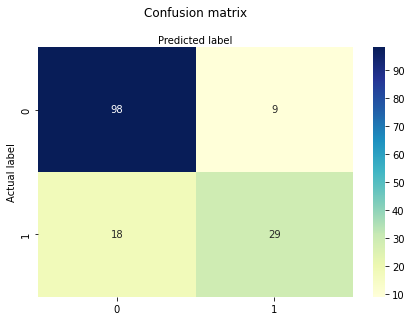

In [50]:
import seaborn as sns
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')